<a href="https://colab.research.google.com/github/ZY0TT0/Deep-Learning-Lab/blob/main/3Oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 106, 86, 36)         │           1,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 53, 43, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 49, 39, 54)          │          48,654 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 24, 19, 54)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 24624)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2024)                │      49,841,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1024)                │       2,073,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,500,114 (200.27 MB)

 Trainable params: 52,500,114 (200.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4/4 - 14s - 3s/step - accuracy: 0.0482 - loss: 3.4475 - val_accuracy: 0.0000e+00 - val_loss: 3.0573
Epoch 2/5
4/4 - 9s - 2s/step - accuracy: 0.0526 - loss: 3.0055 - val_accuracy: 0.0000e+00 - val_loss: 3.0319
Epoch 3/5
4/4 - 0s - 63ms/step - accuracy: 0.0526 - loss: 2.9975 - val_accuracy: 0.0833 - val_loss: 3.0063
Epoch 4/5
4/4 - 0s - 45ms/step - accuracy: 0.0833 - loss: 2.9843 - val_accuracy: 0.0833 - val_loss: 3.0019
Epoch 5/5
4/4 - 0s - 76ms/step - accuracy: 0.0833 - loss: 2.9740 - val_accuracy: 0.0833 - val_loss: 2.9834
Test loss: 2.9657
Test accuracy: 0.1625


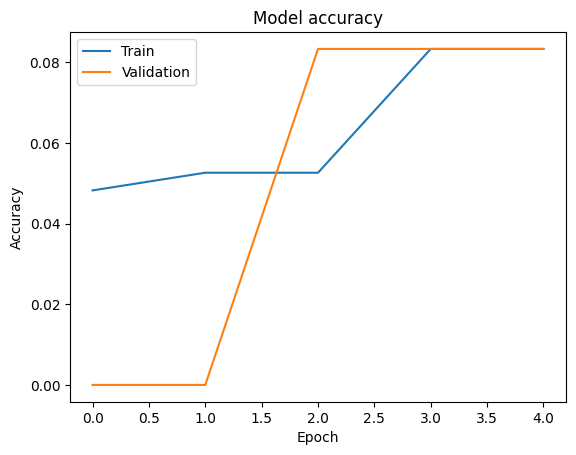

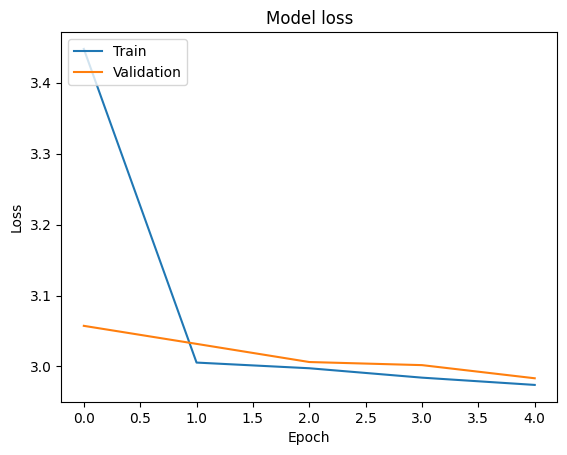

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
data = np.load('ORL_faces.npz')

# Load the train and test images
x_train = data['trainX']
x_test = data['testX']

# Normalize images to the range [0, 1]
x_train = np.array(x_train, dtype='float32') / 255.0
x_test = np.array(x_test, dtype='float32') / 255.0

# Load the labels
y_train = data['trainY']
y_test = data['testY']

# Split the training data into train and validation sets (95% train, 5% validation)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.05, random_state=1234)

# Reshape the images to include the channel dimension (grayscale)
im_rows, im_cols = 112, 92
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(-1, *im_shape)
x_test = x_test.reshape(-1, *im_shape)
x_valid = x_valid.reshape(-1, *im_shape)

# Convert the labels to one-hot encoding
num_classes = 20  # Assuming 20 classes
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
y_valid = to_categorical(y_valid, num_classes=num_classes)

# Build the CNN model
cnn_model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer for 20 classes
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
cnn_model.summary()

# Train the model
history = cnn_model.fit(
    np.array(x_train), np.array(y_train),
    batch_size=64,
    epochs=5,
    verbose=2,
    validation_data=(np.array(x_valid), np.array(y_valid))
)

# Evaluate the model on the test set
scor = cnn_model.evaluate(np.array(x_test), np.array(y_test), verbose=0)

print('Test loss: {:.4f}'.format(scor[0]))
print('Test accuracy: {:.4f}'.format(scor[1]))

# Plot accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
